# Quick Demo for kadatasci.ml

In [1]:
%matplotlib inline

In [2]:
import sys
import matplotlib.pyplot as plt
import ipywidgets
from IPython.display import display
import seaborn as sns
sys.path.append("..")
import util.bq_util

### Authorize clients

In [3]:
bq, gcs = util.bq_util.get_authed_clients()

Authenticating with BigQuery and GCS...
Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&client_id=124072386181-qqedvnl36ver0khc3pmqbh4bevlh58qd.apps.googleusercontent.com&access_type=offline

Enter verification code: 4/P5Sis3oKM2FDmkcC1EpWVM_1wEbGqOCkdinw7MY4uAk
Authentication successful.


### You should now have a bigquery client and a boto client authorized to access GCS

In [4]:
print bq
print gcs

<module 'boto' from '/Users/amy/.virtualenv/dataenv/lib/python2.7/site-packages/boto/__init__.pyc'>


### Construct and execute a query

In [5]:
exclude = ["sat-v1", "test-prep"]
query = """SELECT * FROM latest_content.topic_tree WHERE domain NOT IN ('%s')""" % ("', '".join(exclude))
print query

SELECT * FROM latest_content.topic_tree WHERE domain NOT IN ('sat-v1', 'test-prep')


In [7]:
topic_tree = util.bq_util.query_to_df(query)

Job ID,End time,Duration,Rows,Data size,Cost
job_IIThjnOlmD3bZoy0sMf2Ux57m3w,2016-01-13 09:20:23,10,"16,706",2.4MiB,0.0¢


In [8]:
topic_tree.head()

,path_index,domain,subject,topic,tutorial,kind,title,id,node_slug
0,1,math,pre-algebra,decimals-pre-alg,percent-intro-pre-alg,Exercise,Rewriting decimals as fractions,231802990,e/converting_decimals_to_fractions_1
1,2,math,arithmetic,decimals,decimal_to_fraction,Exercise,Rewriting decimals as fractions,231802990,e/converting_decimals_to_fractions_1
2,3,math,arithmetic,fractions,decimals_fractions,Exercise,Rewriting decimals as fractions,231802990,e/converting_decimals_to_fractions_1
3,5,math,arithmetic,decimals,percent_tutorial,Exercise,Rewriting decimals as fractions,231802990,e/converting_decimals_to_fractions_1
4,6,math,in-sixth-grade-math,decimals-1,tenths-hundredths,Exercise,Rewriting decimals as fractions,231802990,e/converting_decimals_to_fractions_1


### Plot results

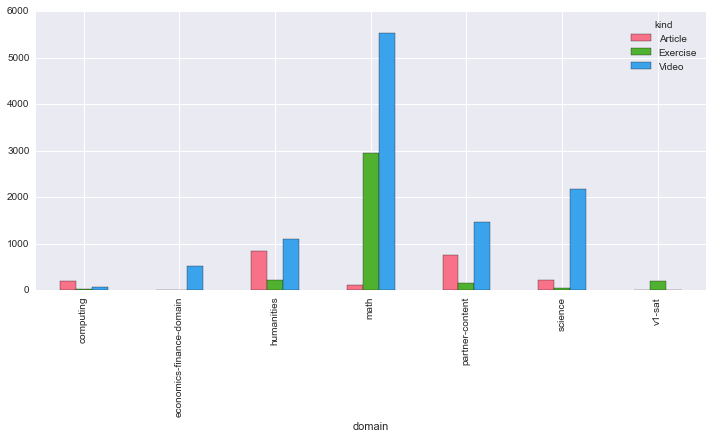

In [9]:
f, ax = plt.subplots(figsize=[12,5])
plotdata = topic_tree.groupby(["domain", "kind"]).count().unstack("kind")['id']
plotdata.plot(kind="bar", ax=ax, color=sns.color_palette("husl", len(topic_tree.kind.unique())))

In [10]:
selector = ipywidgets.Dropdown(description="Content Type", options = list(topic_tree.kind.unique()))
search = ipywidgets.Text(description="Query", placeholder="e.g. equations")
container = ipywidgets.HBox([selector, search])
display(container)

In [11]:
columns = ["kind", "domain", "subject", "topic", "title"]
topic_tree[
    (topic_tree["kind"]==selector.selected_label) & 
    (topic_tree["title"].apply(lambda x: search.value.lower() in x.lower()))
    ][columns]

,kind,domain,subject,topic,title
0,Exercise,math,pre-algebra,decimals-pre-alg,Rewriting decimals as fractions
1,Exercise,math,arithmetic,decimals,Rewriting decimals as fractions
2,Exercise,math,arithmetic,fractions,Rewriting decimals as fractions
3,Exercise,math,arithmetic,decimals,Rewriting decimals as fractions
4,Exercise,math,in-sixth-grade-math,decimals-1,Rewriting decimals as fractions
5,Exercise,math,fr-eigth-grade-math,Fractions-3,Rewriting decimals as fractions
6,Exercise,partner-content,big-history-project,solar-system-and-earth,Quiz: Our Solar System and Earth
7,Exercise,math,integral-calculus,indefinite-definite-integrals,Graphs of antiderivatives
8,Exercise,math,cc-eighth-grade-math,cc-8th-linear-equations-functions,Generate input-output pairs of a function
9,Exercise,math,fr-tenth-grade-math,"Les-Fonctions-Définitions,-propriétés",Generate input-output pairs of a function
